# 2º Período ✅

# Imports e visualização geral dos dataframes

In [ ]:
# imports de bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans, DBSCAN, MeanShift

In [ ]:
# preços de casas na Califórnia 

cf_housing_prices = "/content/housing.csv"
df = pd.read_csv(cf_housing_prices)

In [ ]:
# visão das 5 primeiras linhas do dataframe

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# One hot encoding, normalização e tratamento dos dados 

In [ ]:
# verificando quantas categorias existem para a feature 'ocean_proximity'

df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
# utilizando o get_dummies (= OneHotEncoding) que cria uma feature para cada categoria e 
# faz torna os dados binário: 1 (true), 0 (false)

df = df.rename(columns = {'ocean_proximity': 'op'})
df = pd.get_dummies(df, columns = ['op'])

* Transformação de dados categóricos em novas features binárias (One hot encoding). Valores númericos facilitam muito a análise de dados por meio de algoritmos de regressão e previsão de dados.

In [ ]:
# verificando as 5 primeiras linhas do dataframe após a mudança

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,op_<1H OCEAN,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [ ]:
# verificando quantos valores 1 (true) e 0 (falso) existem nas novas features 

print(df['op_<1H OCEAN'].value_counts())
print(df['op_INLAND'].value_counts())
print(df['op_ISLAND'].value_counts())
print(df['op_NEAR BAY'].value_counts())
print(df['op_NEAR OCEAN'].value_counts())

0    11504
1     9136
Name: op_<1H OCEAN, dtype: int64
0    14089
1     6551
Name: op_INLAND, dtype: int64
0    20635
1        5
Name: op_ISLAND, dtype: int64
0    18350
1     2290
Name: op_NEAR BAY, dtype: int64
0    17982
1     2658
Name: op_NEAR OCEAN, dtype: int64


In [ ]:
# verificando os tipos de dados do dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   op_<1H OCEAN        20640 non-null  uint8  
 10  op_INLAND           20640 non-null  uint8  
 11  op_ISLAND           20640 non-null  uint8  
 12  op_NEAR BAY         20640 non-null  uint8  
 13  op_NEAR OCEAN       20640 non-null  uint8  
dtypes: float64(9), uint8(5)
memory usage: 1.5 MB


In [ ]:
# verificando se há valores faltantes nas features

df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
op_<1H OCEAN            0
op_INLAND               0
op_ISLAND               0
op_NEAR BAY             0
op_NEAR OCEAN           0
dtype: int64

In [ ]:
# forma do dataframe

df.shape

(20640, 14)

* 207 linhas de 20640 linhas é menos de 1% do dataset, então excluir tais informações não prejudica significativamente a análise dos dados.

In [ ]:
# retirando linhas com valores faltantes

df.dropna(inplace = True)  
df.shape

(20433, 14)

In [ ]:
# vendo alguns atributos do dataframe após retirar os valores faltantes

df.describe().transpose() # fazendo a matriz transposta

,count,mean,std,min,25%,50%,75%,max
longitude,20433.0,-119.570689,2.003578,-124.3500,-121.8000,-118.4900,-118.010,-114.3100
latitude,20433.0,35.633221,2.136348,32.5400,33.9300,34.2600,37.720,41.9500
housing_median_age,20433.0,28.633094,12.591805,1.0000,18.0000,29.0000,37.000,52.0000
total_rooms,20433.0,2636.504233,2185.269567,2.0000,1450.0000,2127.0000,3143.000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.000,6445.0000
population,20433.0,1424.946949,1133.208490,3.0000,787.0000,1166.0000,1722.000,35682.0000
households,20433.0,499.433465,382.299226,1.0000,280.0000,409.0000,604.000,6082.0000
median_income,20433.0,3.871162,1.899291,0.4999,2.5637,3.5365,4.744,15.0001
median_house_value,20433.0,206864.413155,115435.667099,14999.0000,119500.0000,179700.0000,264700.000,500001.0000
op_<1H OCEAN,20433.0,0.442128,0.496652,0.0000,0.0000,0.0000,1.000,1.0000


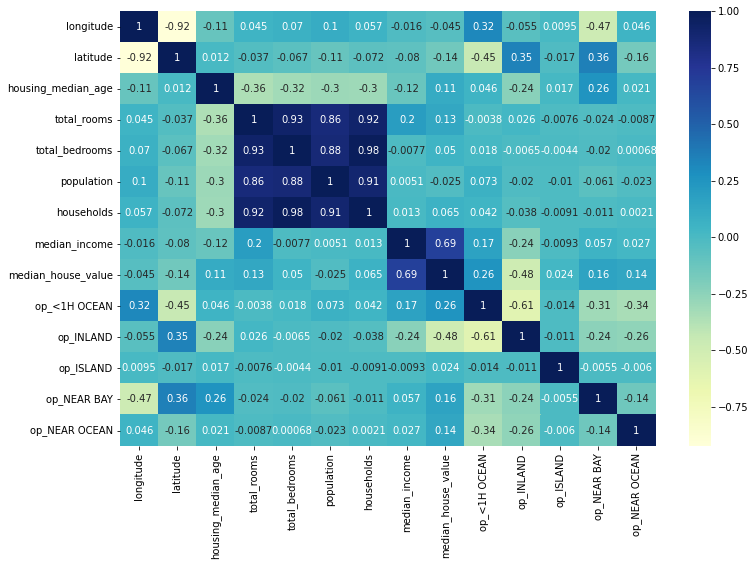

In [ ]:
# matriz de correlação e verificando correlação entre as features

corr = df.corr()
fig, axe = plt.subplots(figsize = (12,8))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = 'YlGnBu', annot = True)

Tipos de dados: 
*   Variáveis quantitativas: Inteval Data, Ratio Data.
  * Variáveis discretas e variáveis contínuas.

*   Variáveis categórias/qualitativas: Nominal Data, Ordinal Data. 



Importante para aplicar o PCA:
* Para aplicar o PCA, os dados precisam estar normalizados (com média em 
0 e desvio padrão de 1 para as features que podem assumir valores negativos), e nomalização MaxMin para as features que não podem assumir valores negativos. 





In [ ]:
# criando um novo df_norm (armazena dados normalizados) fazendo uma cópia do data frame

df_norm = df.copy()

# variável que carrega a função normalização 'MinMaxScaler'

mm_scaler = MinMaxScaler()

# normalizando todos os dados com o MinMaxScaler

df_norm = pd.DataFrame(mm_scaler.fit_transform(df_norm), columns=df_norm.columns)


In [ ]:
df_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,op_<1H OCEAN,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0.0,0.0,0.0,1.0,0.0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0.0,0.0,0.0,1.0,0.0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0.0,0.0,0.0,1.0,0.0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0.0,0.0,0.0,1.0,0.0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0.0,0.0,0.0,1.0,0.0


In [ ]:
# variável que carrega a função normalização 'StandardScaler'

scaler_standard = StandardScaler()

# normalizando apenas duas features com centralização em 0 e desvio padrão em 1
# são as únicas features que podem receber falores negativos 

df_aux = pd.DataFrame(df['longitude'])
df_norm['longitude'] = scaler_standard.fit_transform(df_aux)

df_aux = pd.DataFrame(df['latitude'])
df['latitude'] = scaler_standard.fit_transform(df_aux)


df_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,op_<1H OCEAN,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN
0,-1.327314,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0.0,0.0,0.0,1.0,0.0
1,-1.322323,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0.0,0.0,0.0,1.0,0.0
2,-1.332305,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0.0,0.0,0.0,1.0,0.0
3,-1.337296,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0.0,0.0,0.0,1.0,0.0
4,-1.337296,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0.0,0.0,0.0,1.0,0.0


In [ ]:
 # criando um novo dataframe fazendo uma cópia do dataframe normalizado para a regressão logística
 # df_lor será usado na regressão logística

df_lor = df_norm.copy()

# Detecção, extração e remoção de outliers para a regressão linear

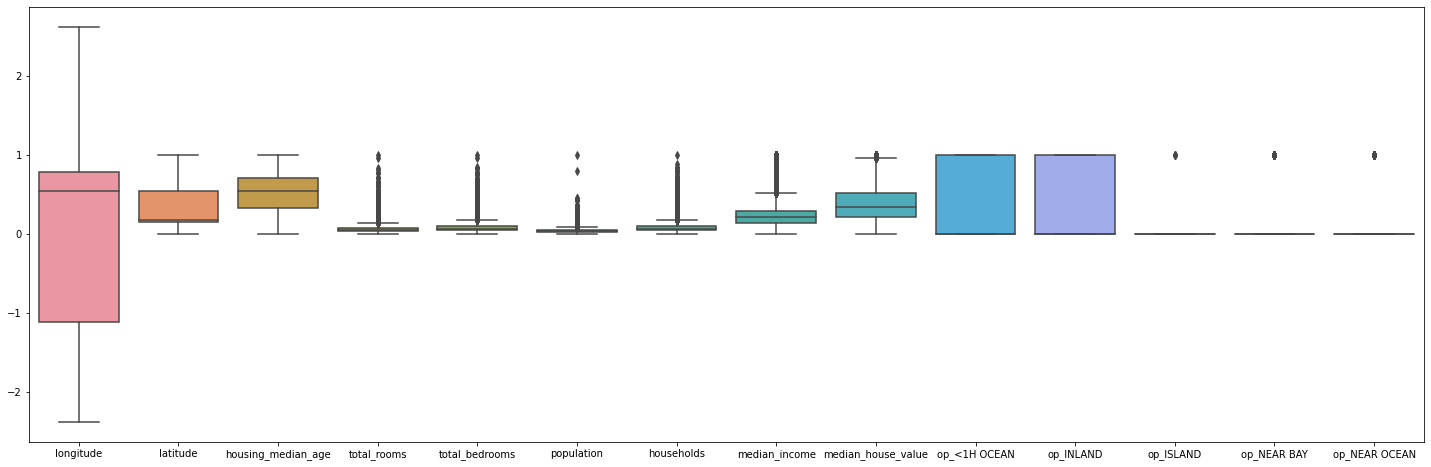

In [ ]:
# visualizando os outliers por meio de um boxplot

plt.figure(figsize = (25, 8))
sns.boxplot(data = df_norm)

* Detecção, extração e remoção de ouliers de todas as features dos datasets 'df_norm' e 'df'.

In [ ]:
# função que detecta os outliers nas features por meio da análise interquantil 

def outliers(df, feature):
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3 - Q1

  lower_boundary = Q1 - (1.5*IQR)
  upper_boundary = Q3 + (1.5*IQR)

  out_index = df.index[ (df[feature] < lower_boundary) | (df[feature] > upper_boundary)]

  return out_index

In [ ]:
# mapeando os índices que mapeiam linhas outliers no decorrer das features de 'df_norm'

index_list = []
for feature in df_norm.columns:
  index_list.extend(outliers(df_norm, feature))

In [ ]:
# função que exclui linhas que possuem outliers

def drop_indexes(dfx, indexes):
  indexes = sorted(set(indexes))
  dfx = dfx.drop(indexes)
  return dfx

In [ ]:
# retirando outliers do dataframe normalizado 'df_norm'

df_norm = drop_indexes(df_norm, index_list)
print(df_norm.shape)


(13340, 14)


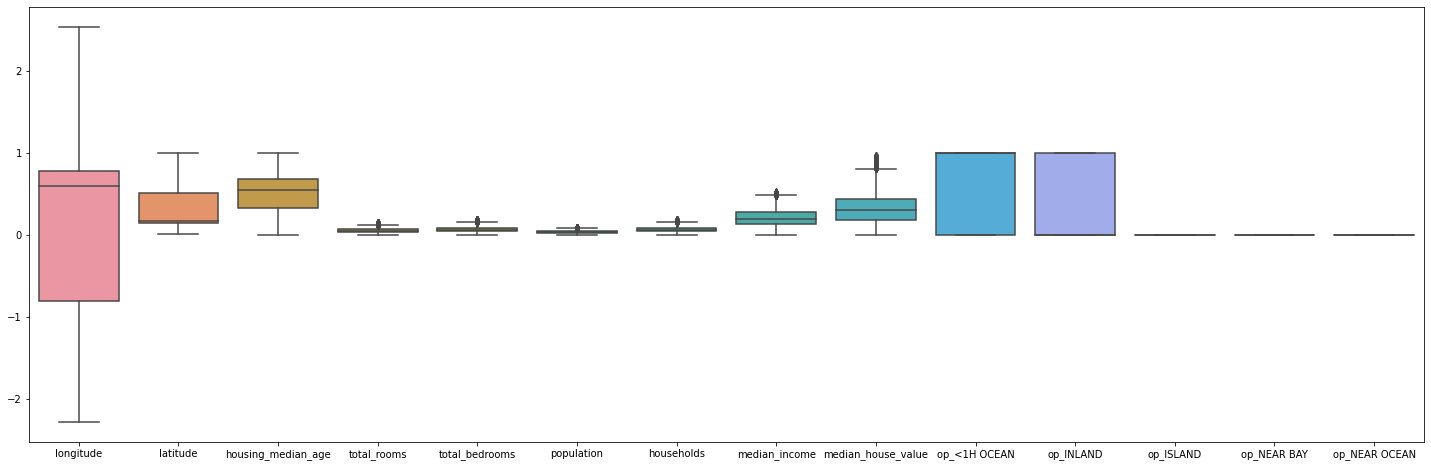

In [ ]:
# verificando que os outliers foram removidos

fig = plt.figure(figsize = (25, 8))
sns.boxplot(data = df_norm)

# PCA (Principal Component Analysis) e redução de dimensionalidade 


In [ ]:
# resentando o índice do dataframe 'df_norm'

df_norm = df_norm.reset_index()
df_norm = df_norm.drop(['index'], axis = 1)
df_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,op_<1H OCEAN,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN
0,-1.197543,0.541977,0.607843,0.032580,0.029950,0.013509,0.027956,0.383271,0.857730,1.0,0.0,0.0,0.0,0.0
1,-1.207525,0.538789,0.156863,0.093189,0.110180,0.065529,0.115442,0.285920,0.416495,1.0,0.0,0.0,0.0,0.0
2,-1.197543,0.534538,0.392157,0.110382,0.121353,0.060792,0.129584,0.283768,0.479588,1.0,0.0,0.0,0.0,0.0
3,-1.192552,0.535600,0.274510,0.090874,0.092489,0.049721,0.091761,0.359947,0.553608,1.0,0.0,0.0,0.0,0.0
4,-1.202534,0.535600,0.372549,0.104888,0.159839,0.058185,0.160171,0.219535,0.416289,1.0,0.0,0.0,0.0,0.0


* O PCA não é um bom procedimento para dados discretos. Afinal, o PCA em si faz uma discretização dos dados em forma de combinação linear. 

In [ ]:
# retirando a label da regressão linear para não inclui-la nos PCAs e 
# não tornar um modelo de regressão viciado
# retirando features com dados discretos do array do PCA também


# array para o PCA da regressão linear

array_lr = np.matrix(df_norm.drop(['median_house_value', 'op_<1H OCEAN',	'op_INLAND', 'op_ISLAND',	'op_NEAR BAY',	'op_NEAR OCEAN'], axis = 1))

# array para o PCA da regressão logística

array_lor = np.matrix(df_lor.drop(['op_<1H OCEAN', 'op_INLAND', 'op_ISLAND', 'op_NEAR BAY',	'op_NEAR OCEAN'], axis = 1))


## PCA para a regressão linear

In [ ]:
# definindo número de componentes principais do PCA

pca = PCA(n_components = 3)

# treinando o PCA

pca.fit(array_lr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


PCA(n_components=3)

In [ ]:
# verificando a forma do PCA

pca.components_.shape

(3, 8)

In [ ]:
# autovalores do PCA

pca.components_[0, :]

array([-9.73801899e-01,  2.25862388e-01, -2.55650296e-02,  5.19966750e-04,
       -1.10938917e-03, -1.89262154e-03, -1.12659282e-03, -6.01005710e-03])

In [ ]:
# verificando a % dos dados que os componentes principais representam 

pca.explained_variance_ratio_
np.round(pca.explained_variance_ratio_, 2)

array([0.92, 0.06, 0.01])

In [ ]:
# verificando a soma acumulativa dos componentes principais

np.round(pca.explained_variance_ratio_, 2).cumsum()

array([0.92, 0.98, 0.99])

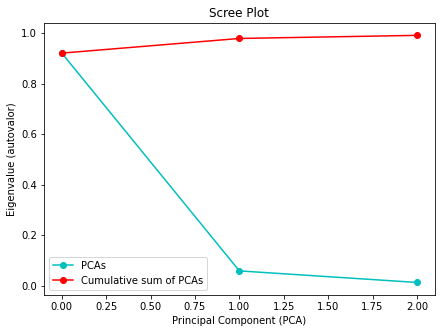

In [ ]:
# plotando gráfico de cotovelo (Scree Plot) dos PCAs

fig = plt.figure(figsize = (7, 5))

plt.plot(pca.explained_variance_ratio_, '-co', label = 'PCAs')
plt.plot(pca.explained_variance_ratio_.cumsum(), '-ro', label = 'Cumulative sum of PCAs')
plt.xlabel('Principal Component (PCA)')
plt.ylabel('Eigenvalue (autovalor)')
plt.title('Scree Plot')
plt.legend()


plt.show()

In [ ]:
#  usaremos 3 componentes principais (~99% da variabilidade dos dados)

pca.fit(array_lr)

pca.components_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


array([[-9.73801899e-01,  2.25862388e-01, -2.55650296e-02,
         5.19966750e-04, -1.10938917e-03, -1.89262154e-03,
        -1.12659282e-03, -6.01005710e-03],
       [ 4.21258534e-02,  7.26615291e-02, -9.89269405e-01,
         4.14425401e-02,  3.85038769e-02,  1.38376552e-02,
         3.28489794e-02,  9.91019191e-02],
       [ 1.28821500e-01,  5.28285328e-01, -4.26181875e-02,
        -5.62957870e-02,  1.33515754e-03, -1.05449063e-02,
        -2.14579625e-02, -8.35919067e-01]])

In [ ]:
# transformando os autovalores do PCA em valores discretizados

PCA1 = pca.transform(array_lr)[:, 0] 
PCA2 = pca.transform(array_lr)[:, 1]
PCA3 = pca.transform(array_lr)[:, 2]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
# criando novas features paras o PCAs em 'df_norm'

df_norm['PCA1'] = PCA1
df_norm['PCA2'] = PCA2
df_norm['PCA3'] = PCA3

In [ ]:
# atribuindo a redução de dimensionalidade

df_norm = df_norm[['median_house_value', 'PCA1', 'PCA2', 'PCA3']]
df_norm.head()

,median_house_value,PCA1,PCA2,PCA3
0,0.857730,1.354180,-0.102111,-0.201879
1,0.416495,1.375041,0.342924,-0.109983
2,0.479588,1.358347,0.111595,-0.120379
3,0.553608,1.356362,0.232501,-0.175851
4,0.416289,1.364260,0.126717,-0.066199


In [ ]:
# verificando a forma

df_norm.shape

(13340, 4)

## PCA para a regressão logística

In [ ]:
# definindo número de componentes principais do PCA

pca = PCA(n_components = 3)


# treinando o PCA

pca.fit(array_lor)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


PCA(n_components=3)

In [ ]:
# verificando a forma do PCA

pca.components_.shape

(3, 9)

In [ ]:
# autovalores do PCA

pca.components_[0, :]

array([ 0.97799038, -0.20654601, -0.02708202,  0.00260563,  0.00462982,
        0.00321814,  0.00368496, -0.00155034, -0.00925003])

In [ ]:
# verificando a % dos dados que os componentes principais representam 

pca.explained_variance_ratio_
np.round(pca.explained_variance_ratio_, 2)

array([0.87, 0.06, 0.05])

In [ ]:
# verificando a soma acumulativa dos componentes principais

np.round(pca.explained_variance_ratio_, 2).cumsum()

array([0.87, 0.93, 0.98])

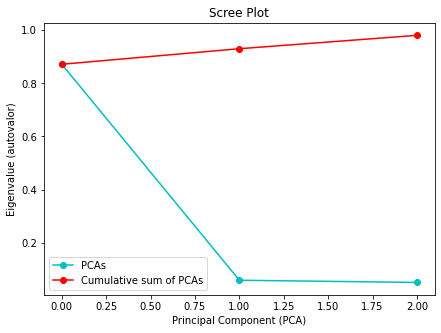

In [ ]:
# plotando gráfico de cotovelo (Scree Plot) dos PCAs

fig = plt.figure(figsize = (7, 5))

plt.plot(pca.explained_variance_ratio_, '-co', label = 'PCAs')
plt.plot(pca.explained_variance_ratio_.cumsum(), '-ro', label = 'Cumulative sum of PCAs')
plt.xlabel('Principal Component (PCA)')
plt.ylabel('Eigenvalue (autovalor)')
plt.title('Scree Plot')
plt.legend()


plt.show()

In [ ]:
#  usaremos 3 componentes principais (~98% da variabilidade dos dados)

pca.fit(array_lor)
pca.components_ 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


array([[ 0.97799038, -0.20654601, -0.02708202,  0.00260563,  0.00462982,
         0.00321814,  0.00368496, -0.00155034, -0.00925003],
       [-0.01548431, -0.17683064,  0.48742771, -0.01094517, -0.03003561,
        -0.01878955, -0.02329091,  0.29658111,  0.80064199],
       [-0.02224515, -0.00946195, -0.84578249,  0.10408587,  0.09597111,
         0.03917637,  0.09108243,  0.28652613,  0.41484366]])

In [ ]:
# transformando os autovalores do PCA em valores discretizados

PCA1 = pca.transform(array_lor)[:, 0] 
PCA2 = pca.transform(array_lor)[:, 1]
PCA3 = pca.transform(array_lor)[:, 2]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
# criando novas features paras o PCAs em 'df_lor'

df_lor['PCA1_lor'] = PCA1
df_lor['PCA2_lor'] = PCA2
df_lor['PCA3_lor'] = PCA3

In [ ]:
# atribuindo a redução de dimensionalidade

df_lor = df_lor[['op_<1H OCEAN', 'PCA1_lor', 'PCA2_lor', 'PCA3_lor']]
df_lor.head()

,op_<1H OCEAN,PCA1_lor,PCA2_lor,PCA3_lor
0,0.0,-1.359882,0.597695,0.102832
1,0.0,-1.340229,0.239762,0.401917
2,0.0,-1.367786,0.514987,-0.183095
3,0.0,-1.372238,0.463867,-0.223264
4,0.0,-1.371982,0.428135,-0.255790


In [ ]:
df_norm.shape

(13340, 4)

# Regressão Linear - Treinamento do modelo de predição

In [ ]:
# definindo as features -> colunas com valores para treinar um modelo 

X = df_norm.drop(['median_house_value'], axis = 1) 
X = np.array(X) 


# definindo a label column -> coluna a ser prevista 

y = df_norm['median_house_value']
y = np.array(y)

In [ ]:
# pegar as features e a label e embaralhá-las 
# tal processo evita uma análise viciada e/ou tendenciosa

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

* "test_size = 0.2" significa que 20% do dataset será destinado ao teste. Afinal, se o teste usar dados que já foram treinados pelo algoritmo, as previsões tendem a ser tendenciosas.

In [ ]:
clf = LinearRegression(n_jobs = -1) # n_jobs = -1  -> mínimo de custo computacional
clf.fit(X_train, y_train) # treinando o algoritmo com dados das features 

LinearRegression(n_jobs=-1)

In [ ]:
# forma geral da reta: y = mx + b

intercept, coeficient = print("Intercept is " + str(clf.intercept_)), print("coefficients are " + str(clf.coef_))

Intercept is 0.33003288033306877
coefficients are [-0.024452   -0.00738935 -1.27007863]


# Regressão Linear II - Predição dos valores da mediana dos valores das casas / Teste de outro algoritmo mais preciso

In [ ]:
# fazendo a previsão dos dados da label

y_pred = clf.predict(X_test) 
r_two = r2_score(y_test, y_pred) 
r_two

0.5525672662246088

* O r2_score é um bom classificador para regressã linear. Indicando 55%, verifica-se que a regressão linear não é o modelo mais adequado para prever a mediana dos valores com esse conjunto de features. Talvez, um modelo de machine learning clássico ou deep learning seria mais apropriado para esse caso.

In [ ]:
# verificando o erro médio quadrado

mean_squared_error(y_test, y_pred)

0.01505264502650031

* O erro médio quadrado de aproximadamente 1,5% é mais um indicador que a regressão linear não é o melhor modelo para fazer previsões para esse conjunto de dados. Afinal, esse indicativo de erro foi relativamente baixo. 

In [ ]:
# criando dataframe de comparação entre valores de testes e valores previstos

comparison_lr = pd.DataFrame({'Predicted': y_pred,'Actual': y_test})
comparison_lr = comparison_lr.reset_index()
comparison_lr = comparison_lr.drop(['index'], axis=1)

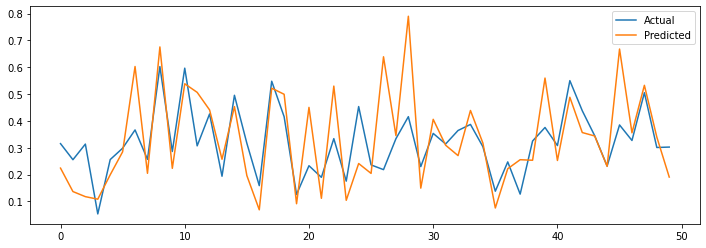

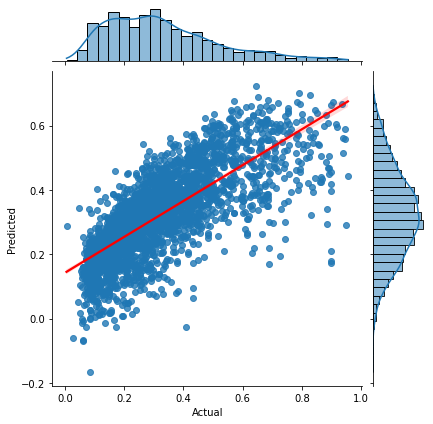

In [ ]:
# plotando gráficos para visualizar melhor a distribuição dos dados

fig = plt.figure(figsize = (12, 4))

plt.plot(comparison_lr[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x = 'Actual', y = 'Predicted', data = comparison_lr, kind='reg', joint_kws={'line_kws':{'color':'red'}})

In [ ]:
# dataframe de comparação

comparison_lr['score_ft'] = np.round(y_pred/y_test*100, 2)
aux = pd.DataFrame(comparison_lr['score_ft'].apply(lambda x: str(x) + ' %'), columns = comparison_lr.columns)
comparison_lr['score_ft'] = aux['score_ft']
comparison_lr

,Predicted,Actual,score_ft
0,0.315430,0.224125,140.74 %
1,0.255446,0.136703,186.86 %
2,0.313648,0.117734,266.4 %
3,0.053346,0.108249,49.28 %
4,0.255986,0.199176,128.52 %
...,...,...,...
2663,0.425714,0.389073,109.42 %
2664,0.338127,0.462681,73.08 %
2665,0.339570,0.082476,411.72 %
2666,0.208309,0.295465,70.5 %


* Fazendo a previsão com um algoritmo de machine learning clássico 'Random Forest Regression' que é composto por várias árvores de decisão durante o treinamento e gera uma saída que é a média das classes como resposta para todas as árvores de decisão. 

In [ ]:
# repetindo o treino das features com o algoritmo 'RandomForestRegressor'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

clf2 = RandomForestRegressor()

clf2.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# fazendo a previsão dos dados da label

y2_pred = clf2.predict(X_test)
clf2.score(X_train, y_train)

0.9542212329278437

In [ ]:
# verificando o erro médio quadrado

mean_squared_error(y_test, y_pred)

0.01505264502650031

In [ ]:
# criando dataframe de comparação entre valores de testes e valores previstos

comparison_rfr = pd.DataFrame({'Predicted': y2_pred,'Actual': y_test})
comparison_rfr = comparison_rfr.reset_index()
comparison_rfr = comparison_rfr.drop(['index'], axis=1)

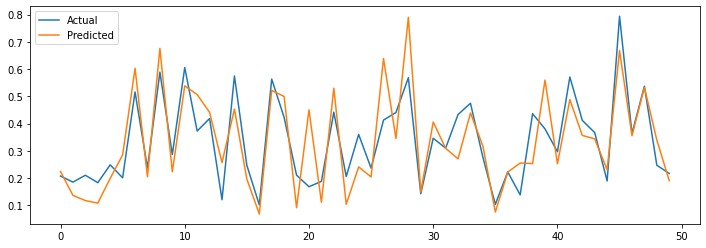

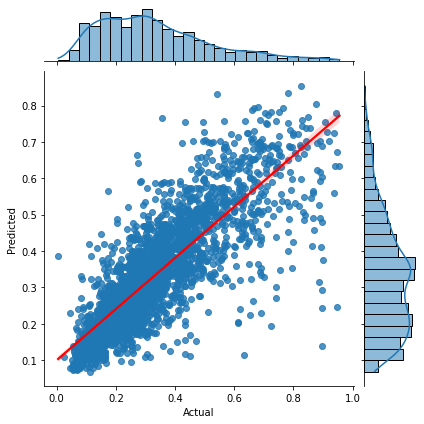

In [ ]:
# plotando gráficos para visualizar melhor a distribuição dos dados

fig = plt.figure(figsize = (12, 4))

plt.plot(comparison_rfr[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x = 'Actual', y = 'Predicted', data = comparison_rfr, kind='reg', joint_kws={'line_kws':{'color':'red'}})

In [ ]:
# dataframe de comparação

comparison_rfr['score_ft_2'] = np.round(y2_pred/y_test*100, 2)
aux = pd.DataFrame(comparison_rfr['score_ft_2'].apply(lambda x: str(x) + ' %'), columns = comparison_rfr.columns)
comparison_rfr['score_ft_2'] = aux['score_ft_2']
comparison_rfr

,Predicted,Actual,score_ft_2
0,0.207651,0.224125,92.65 %
1,0.185191,0.136703,135.47 %
2,0.210525,0.117734,178.81 %
3,0.183226,0.108249,169.26 %
4,0.248749,0.199176,124.89 %
...,...,...,...
2663,0.457881,0.389073,117.69 %
2664,0.328811,0.462681,71.07 %
2665,0.270182,0.082476,327.59 %
2666,0.356836,0.295465,120.77 %


# Regressão Logística - Treinamento do modelo de predição

In [ ]:
# verificando as 5 primeiras linhas de df_lor

df_lor.head()

,op_<1H OCEAN,PCA1_lor,PCA2_lor,PCA3_lor
0,0.0,-1.359882,0.597695,0.102832
1,0.0,-1.340229,0.239762,0.401917
2,0.0,-1.367786,0.514987,-0.183095
3,0.0,-1.372238,0.463867,-0.223264
4,0.0,-1.371982,0.428135,-0.255790


In [ ]:
# definindo as features -> colunas com valores para treinar um modelo

X = df_lor.drop(['op_<1H OCEAN'], axis = 1) 
X = np.array(X) 

# definindo a label column -> coluna a ser prevista 

y = df_lor['op_<1H OCEAN']
y = np.array(y)

In [ ]:
y

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# pegar as features e a label e embaralhá-las 
# tal processo evita uma análise viciada e/ou tendenciosa

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

* "test_size = 0.2" significa que 20% do dataset será destinado ao teste. Afinal, se o teste usar dados que já foram treinados pelo algoritmo, as previsões tendem a ser tendenciosas.

In [ ]:
clf3 = LogisticRegression(n_jobs = -1) # (n_jobs = -1) mínimo de custo computacional
clf3.fit(X_train, y_train) # treinando o algoritmo com dados das fetures 

LogisticRegression(n_jobs=-1)

# Regressão Logística II - Predição binária da proximidade do oceano de uma casa para uma categoria específica 

In [ ]:
# fazendo a previsão dos dados da label

y_pred = clf3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) 
accuracy

0.7076094935160264

* Acurácia não é uma boa métrica para medir a qualidade do modelo, pois pode dar a falsa sensação de qualidade para um modelo que prevê apenas uma categoria (por exemplo, só 1 ou só 0).

In [ ]:
# utilizando métricas para verificar a qualidade do modelo de classificação

cr = classification_report(y_test, y_pred) 
print(cr)

              precision    recall  f1-score   support

         0.0       0.74      0.73      0.73      2264
         1.0       0.67      0.68      0.68      1823

    accuracy                           0.71      4087
   macro avg       0.70      0.71      0.70      4087
weighted avg       0.71      0.71      0.71      4087



* Precision é a capacidade do modelo de não prever uma instância negativa como positiva.

* Recall é a capacidade do modelo de encontrar todas as instâncias positivas.

* A métrica F1 conjuga as duas anteriores como uma média harmônica entre ambas. Ela deve sempre ser priorizada para comparar modelos de classificação em relação à acurária.

In [ ]:
# criando dataframe de comparação entre valores de testes e valores previstos

comparison_lor = pd.DataFrame({'Predicted': y_pred,'Actual':y_test})
comparison_lor = comparison_lor.reset_index()
comparison_lor = comparison_lor.drop(['index'], axis=1)

In [ ]:
# plotando a matriz de confusão da regresão logística

cm = confusion_matrix(y_test, y_pred)
cm

array([[1650,  614],
       [ 581, 1242]])

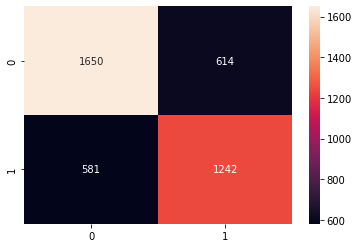

In [ ]:
# mapa de calor da matriz de confusão

sns.heatmap(cm, annot = True, fmt='d')

* Valores na matriz em 1-1 e 0-0 (diagonal principal) são os previstos corretamente. 

In [ ]:
# dataframe de comparação

comparison_lor['score_ft'] = np.round(y_pred/y_test*100, 2)
aux = pd.DataFrame(comparison_lor['score_ft'].apply(lambda x: str(x) + ' %'), columns = comparison_lor.columns)
comparison_lor['score_ft'] = aux['score_ft']
comparison_lor

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


,Predicted,Actual,score_ft
0,1.0,0.0,inf %
1,0.0,1.0,0.0 %
2,0.0,0.0,nan %
3,1.0,0.0,inf %
4,0.0,1.0,0.0 %
...,...,...,...
4082,0.0,0.0,nan %
4083,1.0,1.0,100.0 %
4084,1.0,1.0,100.0 %
4085,0.0,1.0,0.0 %


# Clusterização

* Dividindo em clusters a partir da localização das casas e do valor da mediana das casas.

In [ ]:
# verificando as 5 primeiras linhas do dataframe 'df'

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,op_<1H OCEAN,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN
0,-122.23,1.051717,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,1.042355,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,1.037674,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,1.037674,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,1.037674,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [ ]:
# filtrando features

X = df[['longitude', 'latitude', 'median_house_value']]
X.columns

Index(['longitude', 'latitude', 'median_house_value'], dtype='object')

In [ ]:
# transformando em dataframe

X = pd.DataFrame(X, columns = X.columns)
X

,longitude,latitude,median_house_value
0,-122.23,1.051717,452600.0
1,-122.22,1.042355,358500.0
2,-122.24,1.037674,352100.0
3,-122.25,1.037674,341300.0
4,-122.25,1.037674,342200.0
...,...,...,...
20635,-121.09,1.800677,78100.0
20636,-121.21,1.805358,77100.0
20637,-121.22,1.777272,92300.0
20638,-121.32,1.777272,84700.0


In [ ]:
# normalizando os dados centralizando em 0 e com desvio padrão 1

X = StandardScaler().fit_transform(X)
X[:5, :]

array([[-1.32731375,  1.05171726,  2.12881864],
       [-1.32232256,  1.04235526,  1.31362603],
       [-1.33230494,  1.03767426,  1.25818254],
       [-1.33729614,  1.03767426,  1.16462165],
       [-1.33729614,  1.03767426,  1.17241839]])

## K-means

In [ ]:
# clusterizando com o modelo k-means e treinando o modelo

kmeans = KMeans(n_clusters = 3)
model_km = kmeans.fit(X)
model_km

KMeans(n_clusters=3)

In [ ]:
# verificando a posição dos centroides dos clusters

centroids_km = model_km.cluster_centers_
centroids_km[:5, :]

array([[-1.05475053,  1.10754058, -0.28730045],
       [ 0.81337148, -0.78999389, -0.32196679],
       [ 0.16798784, -0.39259861,  1.87937422]])

In [ ]:
# forma do array com as posições dos centroides

centroids_km.shape

(3, 3)

In [ ]:
# previsão dos clusters

df['cluster_econ_km'] = kmeans.predict(X)
df['cluster_econ_km'] = df['cluster_econ_km'].astype('category')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,op_<1H OCEAN,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN,cluster_econ_km
0,-122.23,1.051717,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,2
1,-122.22,1.042355,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,0
2,-122.24,1.037674,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,0
3,-122.25,1.037674,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,0
4,-122.25,1.037674,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,0


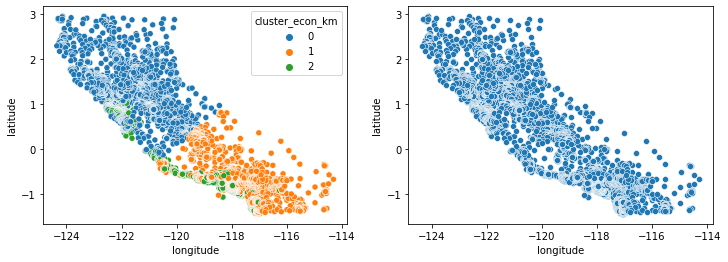

In [ ]:
# plotando os dados e comparando o antes e depois da clusterização com o K-means

fig, (axe1, axe2) = plt.subplots(1, 2, figsize = (12, 4))
sns.scatterplot(x = 'longitude', y = 'latitude', hue = 'cluster_econ_km', data = df, ax = axe1);

sns.scatterplot(x = 'longitude', y = 'latitude', data = df, ax = axe2);

* A clusterização com o Kmeans dessa distribuição de dados não foi tão eficiente. 

* O DBSCAN e o MeanShift são modelos que calculam automaticaticamente a quantidade de clusters, e não é necessário definir uma qunatidade (diferentemente do Kmeans). Para a distribuição de dados deste dataframe, a observação da quantidade de clusters correta não é clara. 

* Faremos a clusterização com o DBSCAN, que clusteriza sob o critério de densidade, e veremos se a clusterização melhora ou piora.

## DBSCAN

In [ ]:
# clusterizando com o modelo k-means e treinando o modelo

dbscan = DBSCAN(eps = 0.2, min_samples = 25)
model_dbs = dbscan.fit(X)
model_dbs

DBSCAN(eps=0.2, min_samples=25)

In [ ]:
# indicação dos clusters dos pontos

model_dbs.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# previsão dos clusters

df['cluster_econ_dbs'] = dbscan.fit_predict(X)
df['cluster_econ_dbs'] = df['cluster_econ_dbs'].astype('category')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,op_<1H OCEAN,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN,cluster_econ_km,cluster_econ_dbs
0,-122.23,1.051717,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,2,0
1,-122.22,1.042355,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,0,0
2,-122.24,1.037674,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,0,0
3,-122.25,1.037674,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,0,0
4,-122.25,1.037674,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,0,0


In [ ]:
# ordenando para verificar os clusters

set(df['cluster_econ_dbs'])

{-1, 0, 1, 2, 3, 4}

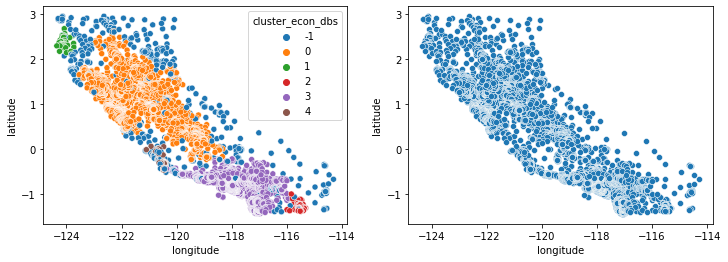

In [ ]:
# plotando os dados e comparando o antes e depois da clusterização com o DBSCAN

fig, (axe1, axe2) = plt.subplots(1, 2, figsize = (12, 4))
sns.scatterplot(x = 'longitude', y = 'latitude', hue = 'cluster_econ_dbs', data = df, ax = axe1);

sns.scatterplot(x = 'longitude', y = 'latitude', data = df, ax = axe2);

* A clusterização com o DBSCAN ainda não foi muito satisfatória. Ultilizaremos outro modelo que considera a densidade de dados, porém com mais precisão. O "MeanShift" é mais eficiente, entretando possui um custo computacional grande pelas sucessivas operações de redefinição de centróides pelo algoritmo e determinação da densidade.

* O interessante é que, como o gráfico plotado tem os eixos latitude e longitude, os pontos distribuídos formaram o mapa da Califórnia. Tendo como cores os diferentes clusters. 